In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score

In [58]:
dataset = pd.read_csv('../Files/diabetes.csv')
dataset

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [59]:
X = dataset.drop(['Diabetic'], axis=1).copy()
y = dataset['Diabetic'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

##### Rozdzielenie operacji w zależności od kolumn

In [60]:
num_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

##### Przygotowanie wartości numerycznych dla braków

In [70]:
# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

In [71]:
print('Surowy zbiór danych - zbiór treningowy:')
print(X_train[num_features].isnull().mean())
X_train_trasnformed = num_preparation.fit_transform(X_train[num_features])
X_train_trasnformed = pd.DataFrame(X_train_trasnformed, columns=num_features)
print('\nWyjście Pipeline - zbiór treningowy')
print(X_train_trasnformed[num_features].isnull().mean())

Surowy zbiór danych - zbiór treningowy:
Pregnancies               0.0
PlasmaGlucose             0.0
DiastolicBloodPressure    0.0
TricepsThickness          0.0
SerumInsulin              0.0
BMI                       0.0
DiabetesPedigree          0.0
Age                       0.0
dtype: float64

Wyjście Pipeline - zbiór treningowy
Pregnancies               0.0
PlasmaGlucose             0.0
DiastolicBloodPressure    0.0
TricepsThickness          0.0
SerumInsulin              0.0
BMI                       0.0
DiabetesPedigree          0.0
Age                       0.0
dtype: float64


In [72]:
print('Surowy zbiór danych - zbiór testowy:')
print(X_test[num_features].isnull().mean())
X_test_trasnformed = num_preparation.transform(X_test[num_features])
X_test_trasnformed = pd.DataFrame(X_test_trasnformed, columns=num_features)
print('\nWyjście Pipeline - zbiór testowy')
print(X_test_trasnformed[num_features].isnull().mean())

Surowy zbiór danych - zbiór testowy:
Pregnancies               0.0
PlasmaGlucose             0.0
DiastolicBloodPressure    0.0
TricepsThickness          0.0
SerumInsulin              0.0
BMI                       0.0
DiabetesPedigree          0.0
Age                       0.0
dtype: float64

Wyjście Pipeline - zbiór testowy
Pregnancies               0.0
PlasmaGlucose             0.0
DiastolicBloodPressure    0.0
TricepsThickness          0.0
SerumInsulin              0.0
BMI                       0.0
DiabetesPedigree          0.0
Age                       0.0
dtype: float64


### Column Transformer

##### transformer - wartości numeryczne i kategoryczne

In [75]:
num_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

In [76]:
num_preparation.fit_transform(X_train)

array([[1.82873200e+06, 1.00000000e+01, 1.01000000e+02, ...,
        2.36255546e+01, 1.79500972e-01, 2.10000000e+01],
       [1.37673700e+06, 8.00000000e+00, 1.16000000e+02, ...,
        3.57983250e+01, 2.03872183e-01, 2.10000000e+01],
       [1.03784600e+06, 1.00000000e+00, 1.17000000e+02, ...,
        1.86664339e+01, 1.59149374e-01, 2.20000000e+01],
       ...,
       [1.17041600e+06, 0.00000000e+00, 1.01000000e+02, ...,
        3.86410823e+01, 2.40418134e-01, 2.30000000e+01],
       [1.59443400e+06, 1.00000000e+00, 1.70000000e+02, ...,
        3.63841863e+01, 7.02568660e-01, 2.30000000e+01],
       [1.34470700e+06, 1.00000000e+00, 5.40000000e+01, ...,
        2.10853008e+01, 1.70777940e-01, 2.20000000e+01]])

### Połączenie Pipeline z modelem

In [85]:
num_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
])

model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])

In [86]:
model_pipeline_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer())]),
                                                  ['Pregnancies',
                                                   'PlasmaGlucose',
                                                   'DiastolicBloodPressure',
                                                   'TricepsThickness',
                                                   'SerumInsulin', 'BMI',
                                                   'DiabetesPedigree',
                                                   'Age'])])),
                ('model', LogisticRegression(max_iter=10000))])

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2500
           1       0.72      0.60      0.65      1250

    accuracy                           0.79      3750
   macro avg       0.77      0.74      0.75      3750
weighted avg       0.78      0.79      0.78      3750



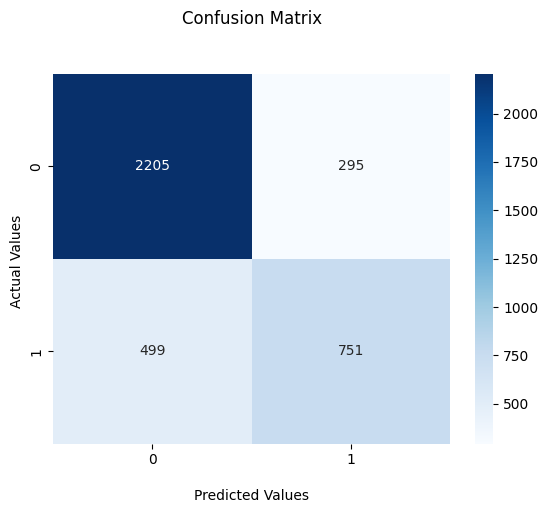

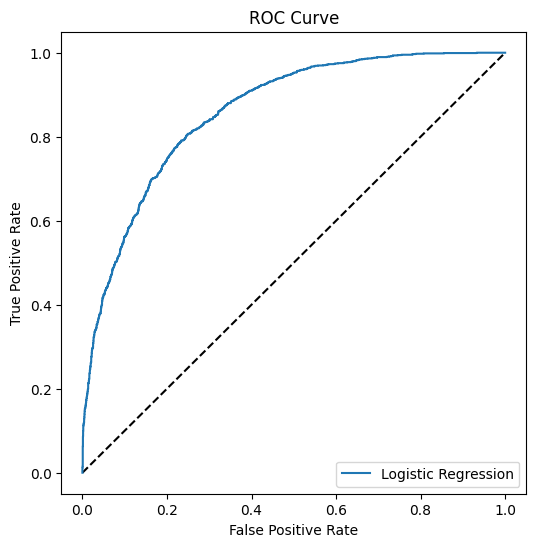

,Model,F1_score,AUC
0,Logistic Regression,0.654181,0.85949


In [87]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})], ignore_index=True)
    return metrics_dataframe

calculate_metrics(model_pipeline_v1, 'Logistic Regression', X_test, y_test)

In [98]:
num_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)), # pca musi być częścią data_preparation, nie num_preparation
    ('scaler_2', StandardScaler())
])

data_preparation = ColumnTransformer(transformers=[
    ('numeric_processing', num_preparation, num_features),
])

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])
model_pipeline_v2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_processing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer()),
                                                                  ('polynomial_features',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('scaler_1',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95)),
                                                                  ('scaler_2',
                                                                   StandardScaler())]),
                                                  ['Pregnancies',
                                                   'PlasmaGlucose',
                                                   'DiastolicBloodPressure',
                                                   'TricepsThickness',
                                                   'SerumInsulin', 'BMI',
                                                   'DiabetesPedigree',
                                                   'Age'])])),
                ('model', LogisticRegression(max_iter=10000))])

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2500
           1       0.74      0.57      0.64      1250

    accuracy                           0.79      3750
   macro avg       0.77      0.73      0.75      3750
weighted avg       0.78      0.79      0.78      3750



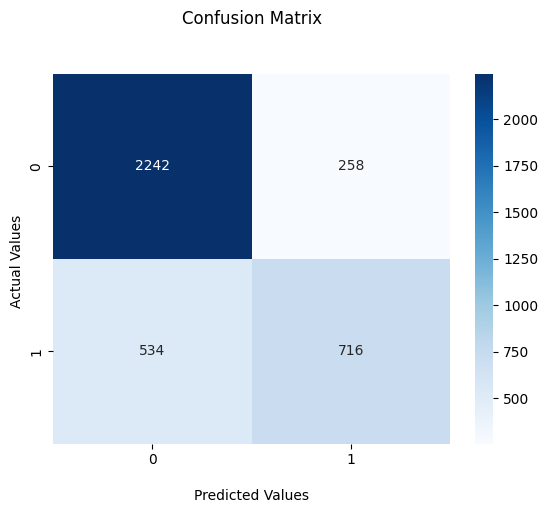

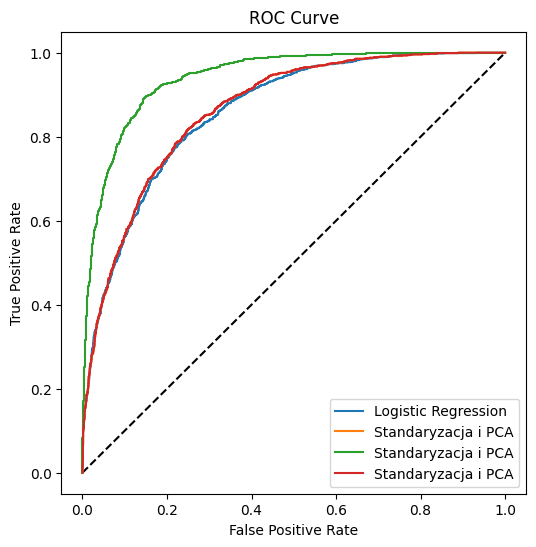

,Model,F1_score,AUC
0,Logistic Regression,0.654181,0.859490
1,Standaryzacja i PCA,0.643885,0.864173
2,Standaryzacja i PCA,0.801964,0.940774
3,Standaryzacja i PCA,0.643885,0.864173


In [99]:
calculate_metrics(model_pipeline_v2, 'Standaryzacja i PCA', X_test, y_test)

### Model z wyborem hiperparametrów

In [100]:
model_pipeline_v3 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])

In [101]:
list(model_pipeline_v3.get_params().keys())

['memory',
 'steps',
 'verbose',
 'preprocessor',
 'model',
 'preprocessor__n_jobs',
 'preprocessor__remainder',
 'preprocessor__sparse_threshold',
 'preprocessor__transformer_weights',
 'preprocessor__transformers',
 'preprocessor__verbose',
 'preprocessor__verbose_feature_names_out',
 'preprocessor__numeric_processing',
 'preprocessor__numeric_processing__memory',
 'preprocessor__numeric_processing__steps',
 'preprocessor__numeric_processing__verbose',
 'preprocessor__numeric_processing__fill_missings',
 'preprocessor__numeric_processing__polynomial_features',
 'preprocessor__numeric_processing__scaler_1',
 'preprocessor__numeric_processing__pca',
 'preprocessor__numeric_processing__scaler_2',
 'preprocessor__numeric_processing__fill_missings__add_indicator',
 'preprocessor__numeric_processing__fill_missings__copy',
 'preprocessor__numeric_processing__fill_missings__fill_value',
 'preprocessor__numeric_processing__fill_missings__keep_empty_features',
 'preprocessor__numeric_processin

In [ ]:
params = {
    'preprocessor__numeric_processing__fill_missings__strategy': ['mean', 'median'],
    'preprocessor__numeric_processing__polynomial_features__degree': [1, 2, 3, 4],
    'preprocessor__numeric_processing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'model__C': np.logspace(-4, 4, 50)
}




grid_search = GridSearchCV(model_pipeline_v3, params, cv=10, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_v3 = grid_search.best_estimator_

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


In [ ]:
calculate_metrics(model_v3, 'Logistic Regression - wybór hiperparametrów', X_test, y_test)